In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KMeans:
    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    @staticmethod
    def euclidean_distance(data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point)**2, axis = 1))
    

    def fit(self, X,max_iterations= 200):
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis = 0),
                                          size = (self.k, X.shape[1]))
        for _ in range(max_iterations):
            y = []

            for data_point in X:
                distances = KMeans.euclidean_distance(data_point, self.centroids)
                cluster_num = np.argmin(distances)
                y.append(cluster_num)

            y = np.array(y)

            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))


            cluster_centers = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[indices], axis=0)[0])
            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)

        self.inertia = 0
        for i in range(len(X)):
            distance = np.sqrt((X[i][0]-self.centroids[y[i]][0])**2+(X[i][1]-self.centroids[y[i]][1])**2)
            distance_squared = distance**2
            self.inertia += distance_squared
            
        return y

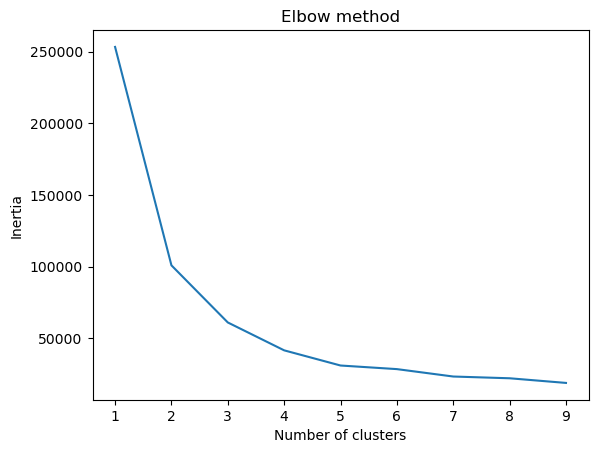

In [3]:
np.random.seed(42)
data = np.random.randint(0, 100, (100,2))

inertias = []
for i in range(1,10):
    kmeans = KMeans(k=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia)

plt.plot(range(1,10), inertias)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()